In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math
from math import log

In [5]:
# 先生成数据：
def data_maker():
    # 我们以我们统计学习方法上的例子为例
    # 这是一个多维数组
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ] 
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']# 这个u的意思就是转中文格式！！！
    
    return datasets,labels

In [6]:
# 对数据进行处理，加上我们的各个数据各个指标的类别
# 当做列指标
datasets,labels = data_maker()
datasets = df(data = datasets, columns= labels)
datasets

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [7]:
# 是否就改成0或者1（是不是可以采用labelencoder编码）
# 这个是我学到的 很不错！！！
# 【创建一个对应的字典】一个一个赋值
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 但是 fit_transform() 不是类方法，而是实例方法。这意味着您必须创建该类的一个实例。！！！！！【注意！！！】
x = datasets["有工作"]
datasets["有工作"]= le.fit_transform(x)
# 【这个方法只能搞一列的！！！】
# 不能！！！【datasets[["有工作","有自己的房子","类别"]]= le.fit_transform(x)】！！！

In [8]:
x1 = datasets["有自己的房子"]
datasets["有自己的房子"] = le.fit_transform(x1)

In [9]:
x2 = datasets["类别"]
datasets["类别"] = le.fit_transform(x2)

In [10]:
datasets

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,0,0,一般,0
1,青年,0,0,好,0
2,青年,1,0,好,1
3,青年,1,1,一般,1
4,青年,0,0,一般,0
5,中年,0,0,一般,0
6,中年,0,0,好,0
7,中年,1,1,好,1
8,中年,0,1,非常好,1
9,中年,0,1,非常好,1


In [11]:
# 下面就是将我们的各个中文的参数转化成对应的指标下的数字
# 比如：青年在这一列就是化成1，中年在这一列就是化为2，老年化成3，，，以此类推
data1 = datasets[["年龄","信贷情况"]]
data1

,年龄,信贷情况
0,青年,一般
1,青年,好
2,青年,好
3,青年,一般
4,青年,一般
5,中年,一般
6,中年,好
7,中年,好
8,中年,非常好
9,中年,非常好


In [12]:
data1.shape[0]

15

In [13]:
# 下面就是将我们的各个中文的参数转化成对应的指标下的数字
# 比如：青年在这一列就是化成1，中年在这一列就是化为2，老年化成3，，，以此类推
d = {"青年":1, "中年":2, "老年":3, "一般":1, "好":2, "非常好":3}
data1 = data1.to_numpy()
data1 = data1[:,0:3]
for i in range(15):
    for j in range(2):
        if data1[i][j] == "青年":
            data1[i][j] = 1
        if data1[i][j] == "中年":
            data1[i][j] = 2
        if data1[i][j] == "老年":
            data1[i][j] = 3
        if data1[i][j] == "一般":
            data1[i][j] = 1
        if data1[i][j] == "好":
            data1[i][j] = 2
        if data1[i][j] == "非常好":
            data1[i][j] = 3

In [14]:
data1

array([[1, 1],
       [1, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [2, 2],
       [2, 3],
       [2, 3],
       [3, 3],
       [3, 2],
       [3, 2],
       [3, 3],
       [3, 1]], dtype=object)

In [15]:
datasets[["年龄","信贷情况"]] = data1

In [16]:
datasets = datasets.to_numpy(dtype= int)

In [17]:
datasets

array([[1, 0, 0, 1, 0],
       [1, 0, 0, 2, 0],
       [1, 1, 0, 2, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0],
       [2, 0, 0, 1, 0],
       [2, 0, 0, 2, 0],
       [2, 1, 1, 2, 1],
       [2, 0, 1, 3, 1],
       [2, 0, 1, 3, 1],
       [3, 0, 1, 3, 1],
       [3, 0, 1, 2, 1],
       [3, 1, 0, 2, 1],
       [3, 1, 0, 3, 1],
       [3, 0, 0, 1, 0]])

In [18]:
x,y = datasets[:,:-1],datasets[:,-1]

In [19]:
x

array([[1, 0, 0, 1],
       [1, 0, 0, 2],
       [1, 1, 0, 2],
       [1, 1, 1, 1],
       [1, 0, 0, 1],
       [2, 0, 0, 1],
       [2, 0, 0, 2],
       [2, 1, 1, 2],
       [2, 0, 1, 3],
       [2, 0, 1, 3],
       [3, 0, 1, 3],
       [3, 0, 1, 2],
       [3, 1, 0, 2],
       [3, 1, 0, 3],
       [3, 0, 0, 1]])

In [20]:
y

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

# 函数构建部分

## 标签的熵：标签的混乱程度
#### entropy：$H(x) = -\sum_{i=1}^{n}p_i\log{p_i}$

In [21]:
# 接下来计算y的熵
def entropy(y):
    # 先找到我们的各个标签值
    unique_values = np.unique(y)
    # 我们定义一个列表用于存储我们的每一个值对应的p值
    value_p = []
    # 开始遍历我们的每种标签值
    for value in unique_values:
    # 找出我们的标签值所在的索引
        p_value = sum(y == value)/len(y)
    # 上面这个就是找到我们的所有标签所对应的概率
        value_p.append(p_value)
    # 将我们的各个标签所对应的概率值放入我们的列表中
        entropy_variable = -sum(value_p * np.log2(value_p))
        # 这个就是py的爽的地方：可以直接对全体进行计算
    return entropy_variable

In [22]:
entropy(y)

0.9709505944546686

## 下面是条件熵：
###  比较有挑战性 我思考一下

#### conditional entropy: $H(X|Y)=\sum{P(X|Y)}\log{P(X|Y)}$
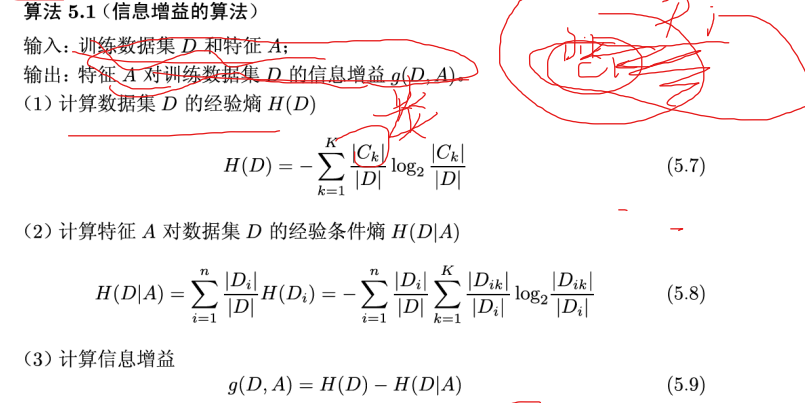
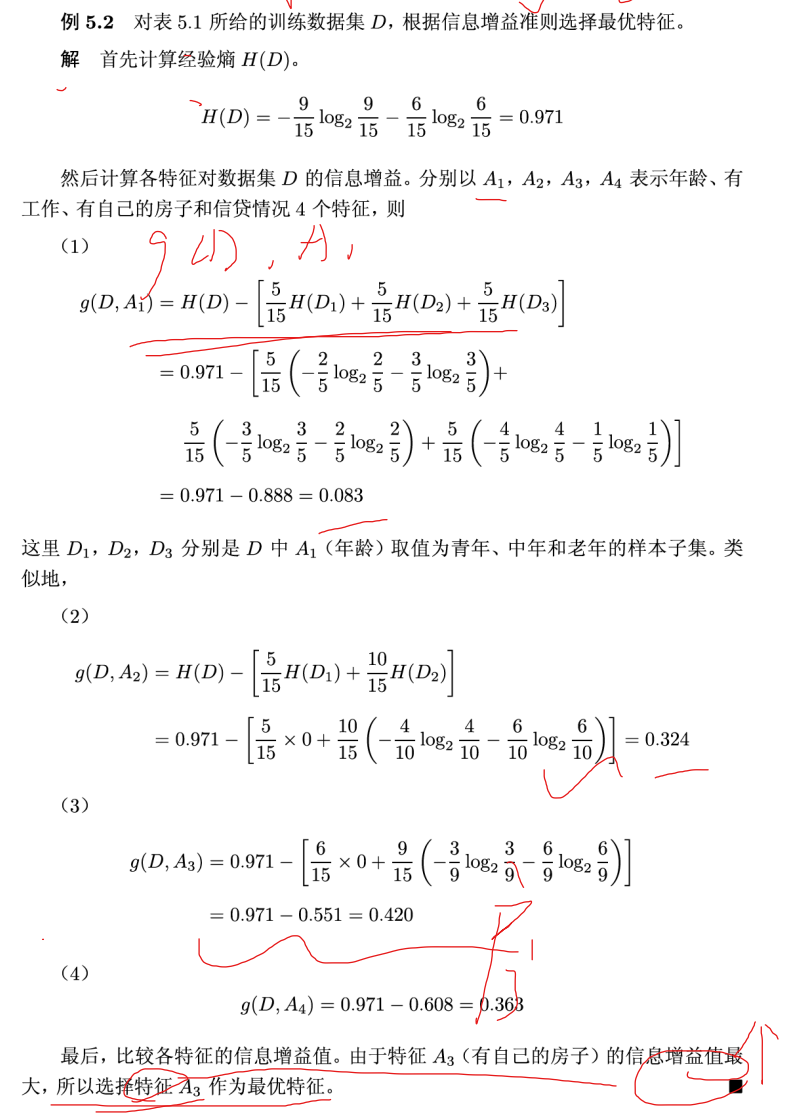

In [23]:
# # 注意！！！我们这个函数输入的参数是x的数据值和我们的以...作为分支特征的索引！！！
# def cond_entro(x,y,cond_x):
#     # 首先先得到我们这个索引有几种x的取值（比如青年，中年，老年的对应的我们设的x的取值都不一样！！！）
#     x_cat = np.unique(x[:,cond_x])
#     # 下面就是存放我们的分类特征cond_x索引对应的各个x的不同取值的概率的列表
#     p_x_incond_x = []
#     # 接下来就是找到我们的标签有几类
#     y_cat = np.unique(y)
#     # 我们下面遍历x的各个取值
#     p_x_y_insamex = []
#     all_ent_x_incond_x = []
#         # 再找到这些索引的对应的标签值：
# #         y_cat_multix_con_x = y[idx]
#         # 再在这些因x的索引cond_x作为分割特征得到的对应索引下：不同取值的每一种取值的x中，再遍历我们标签的全部类别：
#         # 从而得到我们的|Dik|/|Di|
#     for y_value in y_cat:
#         # 终于找到|Dik|/|Di|（有点难用中文表达就这样写了）
#         for x_value in x_cat: 
#         # 我们现在得到对应cond_x索引下的各个x不同取值的不同的对应的p值
#             p_multi_x_cond_x = sum(x[:,cond_x]==x_value)/len(x[:,cond_x])
#             #    p_x_incond_x.append(p_multi_x_cond_x)
#             # 各个|Di|/|D|求出来了
#     # 下面我们要找在这个数据x的索引cond_x作为分割依据下我们的分下来的各个数据对应的标签的熵值（混乱度）
#         # 我们先找各个x = 这个指标下不同取值的索引
#             idx = (x[:,cond_x] == x_value)
#             p_dik_div_d = sum(y[idx] == y_value)/sum(idx)
#         # 存起来同一个的x的对应的各个指标值的在各自相等x类的概率|Dik|/|Di|
#             if p_dik_div_d!=0:
#                 p_x_y_insamex.append(p_dik_div_d)
#             # 接下来就是算我们的因cond_x分割产生的各个x类的条件熵（最后还要累加）
#             ent_everytype_x = -(p_multi_x_cond_x * sum(p_x_y_insamex * np.log2(p_x_y_insamex)))
#     all_ent_x_incond_x.append(ent_everytype_x)
#     return sum(all_ent_x_incond_x)

In [24]:
# 自己再写一遍
def cond_entropy(x, y, cond_x):
    n = len(y)
    x_in_cond_x = x[:,cond_x]
    # 下面这个就是遍历我们的x在这个特征下的全部取值
    tem_entropy = []
    for value in set(x_in_cond_x):# set就是找到值 不重样放到一个数组里面
        idx = np.where(x_in_cond_x == value) # 找到各种在这个特征对应的维度下x的索引
        tem_entropy.append(np.size(idx)/n * entropy(y[idx]))# 必须要np.size！！！！
        # 不能用len，list和nparray不兼容！！！
    return sum(tem_entropy)
        

In [25]:
cond_entropy(x,y,1)

0.6473003963031123

In [26]:
cond_entropy(x, y, 0)

0.8879430945988998

# 下面是信息增益：

In [27]:
# 信息增益
def info_gain(x, y, cond):
    return entropy(y) - cond_entropy(x, y, cond)

# 信息增益比

In [28]:
def info_gain_ratio(x, y, cond):
    return (entropy(y) - cond_entropy(x, y, cond))/cond_entropy(x, y, cond)

In [29]:
gain_a1 = info_gain(x, y, 0);gain_a1

0.08300749985576883

In [30]:
gain_a2 = info_gain(x, y, 1);gain_a2

0.32365019815155627

In [31]:
gain_a2 = info_gain(x, y, 2);gain_a2

0.4199730940219749

In [32]:
gain_a3 = info_gain(x, y, 3);gain_a3

0.36298956253708536

# 下面就是寻找最好的特征来进行分割

In [33]:
def best_split(x,y,method = "info_gain"): #默认就是我们我们的id3
    """根据method指定的方法使用信息增益或信息增益比来计算各个维度的最大信息增益（比），返回特征的axis"""
    n = x.shape[1]
    feature_gain = []
    if method == "info_gain":
        split = info_gain # py特色！！！直接把一个变量赋值成为一个函数对象！！！
    elif method == "info_gain_ratio":
        split = info_gain_ratio
    else: 
        print("No such method")
        return
    for cond_x in range(n):
        feature_gain.append(split(x,y,cond_x))
    best_feature = np.argmax(feature_gain)
    return best_feature

In [34]:
best_split(x,y)

2

# 当我们没有分割的特征的时候：当特征使用完时，返回类别数最多的类别


In [35]:
def majorityCnt(y):
    unique,counts = np.unique(y,return_counts=True)
    max_idx = np.argmax(counts)
    return unique[max_idx]

In [36]:
y

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [37]:
majorityCnt(y)

1

In [38]:
m,n = x.shape
m

15

# 开始ID3,C4.5算法：我们用双重字典来设置决策树的树

In [39]:
x.shape[1]

4

In [40]:
class myclassifier_tree:
    """
    决策树生成算法，
    method指定ID3或C4.5,两方法唯一不同在于特征选择方法不同
    info_gain:       信息增益即ID3
    info_gain_ratio: 信息增益比即C4.5
    
    
    """
    def __init__(self,method="info_gain"):
#         self.threshold = threshold
        self.method = method
    
    def fit(self,x,y,labels):# 注意！！！这里传的是label不用传method了！！！下面我们直接method=self.method可，
        # 非要传的话下面就不用加self了！！！
        # 首先要进行数据的识别：我们的标签要是只有一类，那么我们直接返回一个节点（我们这里直接设成标签）
        labels = labels.copy()
        # 先生成我们的标签列表的副本（我们要对这个标签副本进行操作！！！）
        if len(np.unique(y)) == 1:
            # 我们是递归地实现的，这个也适用于我们刚刚号全部分割好了
            return y[0]
        if x.shape[1] == 1:
            majorityCnt(y)
        
        # 下面进行我们的数据x的分割：
        best_feature = best_split(x,y,method=self.method)
        # 下面就是找到对应的标签：method = self.method
        bestfeaturellabel = labels[best_feature]
        # 下面就是定义我们的树：
        tree = {bestfeaturellabel: {}}
        # 我们选了一个标签之后还要删除！！！
        del(labels[best_feature])
        
        # 下面就是利用递归生成我们的树！！！
        for x_values in set(x[:,best_feature]):
            idx = np.where(x[:,best_feature]== x_values)
            # 表面上只写每次对单个初始分支操作！！！
            # 但后面会递归！！！这个数越长越大！！！
            x_sub = x[idx]
            y_sub = y[idx]
            # 别忘了递归的时候label也要更新！！！
            labels_sub = labels
            # 下面这个递归堪称【神来之笔】
            # 一个for循环循环一次就递归一次（当然可能不止可能同时往下还要继续分支！！！好多fit好多fit，好多for好多for）
            tree[bestfeaturellabel][x_values] = self.fit(x_sub, y_sub, labels_sub) # 参数别传错了!!
            # 我们的值还套了个字典！！！# 我们的值也会变成一个字典的键！！！除非出现fit一开始的特殊情况：如（分完了）之类的
        return tree

In [41]:
My_Tree = myclassifier_tree()
My_Tree.fit(x, y, labels)

{'有自己的房子': {0: {'有工作': {0: 0, 1: 1}}, 1: 1}}